找到文件: ../../RUMDECT/MLP2/MLP_DW2/AL_round_0.pkl
找到文件: ../../RUMDECT/MLP2/MLP_DW2/AL_round_1.pkl
找到文件: ../../RUMDECT/MLP2/MLP_DW2/AL_round_2.pkl
找到文件: ../../RUMDECT/MLP2/MLP_DW2/AL_round_3.pkl
找到文件: ../../RUMDECT/MLP2/MLP_DW2/AL_round_4.pkl
找到文件: ../../RUMDECT/MLP2/MLP_DW2/AL_round_5.pkl
找到文件: ../../RUMDECT/MLP2/MLP_DW2/AL_round_6.pkl
找到文件: ../../RUMDECT/MLP2/MLP_DW2/AL_round_7.pkl
找到文件: ../../RUMDECT/MLP2/MLP_DW2/AL_round_8.pkl
找到文件: ../../RUMDECT/MLP2/MLP_DW2/AL_round_9.pkl
找到文件: ../../RUMDECT/MLP2/MLP_Unc_LC2/AL_round_0.pkl
找到文件: ../../RUMDECT/MLP2/MLP_Unc_LC2/AL_round_1.pkl
找到文件: ../../RUMDECT/MLP2/MLP_Unc_LC2/AL_round_2.pkl
找到文件: ../../RUMDECT/MLP2/MLP_Unc_LC2/AL_round_3.pkl
找到文件: ../../RUMDECT/MLP2/MLP_Unc_LC2/AL_round_4.pkl
找到文件: ../../RUMDECT/MLP2/MLP_Unc_LC2/AL_round_5.pkl
找到文件: ../../RUMDECT/MLP2/MLP_Unc_LC2/AL_round_6.pkl
找到文件: ../../RUMDECT/MLP2/MLP_Unc_LC2/AL_round_7.pkl
找到文件: ../../RUMDECT/MLP2/MLP_Unc_LC2/AL_round_8.pkl
找到文件: ../../RUMDECT/MLP2/MLP_Unc_LC2/AL_round_9.pkl


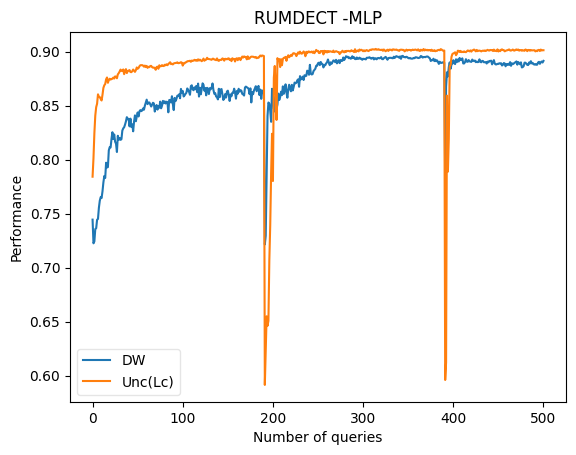

In [2]:
import alipy
from alipy import experiment
from alipy.experiment import ExperimentAnalyser
import os


def load_models_folds(model, num_files,strategy,directory=None):
    model_folds=[]
    if directory is None:
        directory='../../RUMDECT/MLP2/'+str(model)+'_'+str(strategy)+"2"
    for i in range(num_files):
        file_name = 'AL_round_' + str(i) + '.pkl'
        file_path = os.path.join(directory, file_name)

        if os.path.isfile(file_path):
            # 这里可以对找到的文件进行操作或处理
            file = alipy.experiment.StateIO.load(file_path)
            model_folds.append(file)
            print('找到文件:', file_path)
        else:
            print('未找到文件:', file_path)
    return model_folds

model='MLP'
#加载策略folds
DW_folds =load_models_folds(model=model, num_files=10,strategy='DW')
Unc_LC_folds =load_models_folds(model=model, num_files=10,strategy="Unc_LC")


#初始化StateIOContainer
StateIOContainer_DW = alipy.experiment.StateIOContainer(method_name='DW', method_results=[])
StateIOContainer_Unc_LC = alipy.experiment.StateIOContainer(method_name='Unc_LC', method_results=[])
#将folds装载进StateIOContainer
alipy.experiment.StateIOContainer.add_folds(self=StateIOContainer_DW, folds=DW_folds)
alipy.experiment.StateIOContainer.add_folds(self=StateIOContainer_Unc_LC, folds=Unc_LC_folds)
#使用analyser分析绘图
analyser1 = ExperimentAnalyser()

analyser1.add_method(method_name='DW', method_results=StateIOContainer_DW)
analyser1.add_method(method_name='Unc(Lc)', method_results=StateIOContainer_Unc_LC)

analyser1.plot_learning_curves(title='RUMDECT -MLP',show=True,saving_path="./RUMDECT_MLP_500.pdf")
# plt_Ada.ylim(0.48, 0.92)
# plt_Ada.legend()
# plt_Ada.axhline(y=0.889, color='darkgray', linestyle='--', label='Horizontal Line')
# plt_Ada.show()
